***Análisis de ingresos y rentabilidad por producto y categoría en un marketplace de e-commerce***
---

***Olist*** es un marketplace brasileño que conecta pequeños vendedores con múltiples canales de venta digital. El crecimiento sostenible del negocio depende de identificar qué productos y categorías generan mayor valor económico, así como aquellas que presentan ineficiencias relacionadas con precios, volumen de ventas o costos logísticos.

***Objetivo del proyecto:*** Analizar el desempeño comercial del marketplace para identificar productos y categorías que maximizan los ingresos y detectar oportunidades de optimización del portafolio, apoyando la toma de decisiones estratégicas de equipos comerciales y de negocio.

***Preguntas de negocio***

* ¿Qué categorías concentran la mayor parte de los ingresos del marketplace?
* ¿Qué productos venden en alto volumen pero aportan poco ingreso?
* ¿Qué categorías presentan precios promedio altos o bajos y cómo impacta esto en el revenue?
* ¿Existen categorías con costos logísticos que reducen su rentabilidad relativa?
* ¿Dónde se encuentra el mayor potencial de optimización comercial?

***Alcance del análisis:*** El análisis se enfoca en pedidos completados entre 2016 y 2018, considerando información de órdenes, productos y categorías. Se evalúa el desempeño comercial a nivel agregado y comparativo, sin profundizar en comportamiento individual del cliente ni en modelos predictivos.

***Consideraciones sobre los datos:*** Los datos corresponden a transacciones reales anonimizadas. Un pedido puede incluir múltiples productos y vendedores, por lo que se aplican controles para evitar duplicaciones en el cálculo de ingresos. Los costos de envío se utilizan como una aproximación para evaluar impacto logístico, no como margen financiero real.

***Métricas clave***

* Ingreso total y por categoría
* Ingreso por producto
* Precio promedio por categoría
* Volumen de ventas
* Costo de envío promedio
* Ingreso neto aproximado (precio – costo de envío)

***Valor del proyecto:*** Este análisis permite priorizar categorías estratégicas, identificar productos con bajo aporte económico y detectar oportunidades de mejora en la estructura comercial. Demuestra la capacidad de traducir datos transaccionales en insights accionables para negocio.

***Impacto esperado en el negocio:*** Los resultados pueden apoyar decisiones como la optimización del portafolio de productos, el rediseño de estrategias comerciales, la priorización de categorías rentables y la identificación de áreas donde los costos logísticos afectan el desempeño financiero.

---

### ***Carga de librerías***

En esta sección se importan las librerías necesarias para la manipulación, análisis y visualización de datos. Estas herramientas permitirán explorar los datasets, construir métricas de negocio y comunicar resultados de forma clara y profesional.

In [42]:
# Manipulación y análisis de datos
import pandas as pd
import numpy as np

# Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de visualizaciones y pandas
sns.set(style="whitegrid")
pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", "{:,.2f}".format)

### ***Carga de los datasets***

Se cargan los datasets necesarios para el análisis del desempeño comercial del marketplace. Se importan únicamente las tablas relevantes para el objetivo definido, asegurando un enfoque eficiente y orientado a negocio desde el inicio.

In [ ]:
customers_df = pd.read_csv("data/customers.csv")
orders_df = pd.read_csv("data/orders.csv")
order_items_df = pd.read_csv("data/order_items.csv")
products_df = pd.read_csv("data/products.csv")
category_translation_df = pd.read_csv("data/category_translation.csv")

### ***Exploración inicial de los datasets***

Se inspecciona la estructura básica de cada dataset (dimensiones, columnas y primeras filas). El objetivo es entender el tipo de información disponible, validar que las variables clave existen y anticipar posibles desafíos de calidad de datos antes de avanzar al modelado y análisis de negocio.

In [44]:
display(customers_df.head())

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [45]:
display(orders_df.head())

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [46]:
display(orders_df.head())

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [47]:
display(order_items_df.head())

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [48]:
display(products_df.head())

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.00,287.00,1.00,225.00,16.00,10.00,14.00
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.00,276.00,1.00,"1,000.00",30.00,18.00,20.00
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.00,250.00,1.00,154.00,18.00,9.00,15.00
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.00,261.00,1.00,371.00,26.00,4.00,26.00
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.00,402.00,4.00,625.00,20.00,17.00,13.00


In [49]:
display(category_translation_df.head())

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [50]:
# Dimensiones de los datasets
print("Customers:", customers_df.shape)
print("Orders:", orders_df.shape)
print("Order Items:", order_items_df.shape)
print("Products:", products_df.shape)
print("Category Translation:", category_translation_df.shape)

Customers: (99441, 5)
Orders: (99441, 8)
Order Items: (112650, 7)
Products: (32951, 9)
Category Translation: (71, 2)


### ***Revisión de estructura y tipos de datos***

Se revisan los tipos de datos, valores nulos y consistencia general de las columnas. Este paso es clave para anticipar transformaciones necesarias y validar que las variables críticas para el análisis de ingresos y rentabilidad están correctamente definidas.

In [51]:
# Información general de cada dataset
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [52]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [53]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [54]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [55]:
category_translation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


*El dataset ***customers_df*** presenta información completa y consistente a nivel de cliente, adecuada para análisis de segmentación y ubicación. El dataset ***orders_df*** contiene el flujo completo de las órdenes, aunque algunas variables de fechas presentan ***valores nulos***, lo que hace necesario ***filtrar pedidos válidos*** para evitar distorsiones en métricas comerciales. El dataset ***order_items_df*** es la ***fuente principal de ingresos y costos***, con datos completos y correctamente tipados, lo que permite un análisis confiable de revenue y costos logísticos. El dataset p***roducts_df*** muestra ***valores nulos en la categoría de algunos productos***, aspecto a considerar al analizar desempeño por categoría. Finalmente, ***category_translation_df*** es una tabla de referencia ***completa y consistente***, utilizada para estandarizar las categorías de producto para análisis de negocio.*

### ***Definición del dataset núcleo y estrategia de integración (joins)***

Se define la tabla central del análisis comercial y se establece la estrategia de unión entre datasets. El objetivo es construir una tabla analítica que permita calcular ingresos y métricas por producto y categoría sin duplicar información ni distorsionar resultados, un punto crítico en análisis de e-commerce.

***Dataset núcleo del análisis:*** Para el objetivo de optimización de ingresos y rentabilidad:

* order_items_df es la tabla núcleo
* Cada fila representa un producto vendido dentro de una orden
* Es la única tabla que contiene price y freight_value
* Las demás tablas enriquecen esta información.

In [56]:
# Selección de columnas necesarias para evitar sobrecarga de datos
orders_subset = orders_df[
    ["order_id", "order_status"]
]

products_subset = products_df[
    ["product_id", "product_category_name"]
]

category_translation_subset = category_translation_df[
    ["product_category_name", "product_category_name_english"]
]

# Filtrar únicamente órdenes entregadas
orders_valid = orders_subset[
    orders_subset["order_status"] == "delivered"
]

# Join order_items con orders (estado de la orden)
df_merged = order_items_df.merge(
    orders_valid,
    on="order_id",
    how="inner"
)

# Join con productos
df_merged = df_merged.merge(
    products_subset,
    on="product_id",
    how="left"
)

# Join con traducción de categorías
df_merged = df_merged.merge(
    category_translation_subset,
    on="product_category_name",
    how="left"
)

# Revisión rápida del dataset integrado
df_merged.shape
df_merged.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,order_status,product_category_name,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,delivered,cool_stuff,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,delivered,pet_shop,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,delivered,moveis_decoracao,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,delivered,perfumaria,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,delivered,ferramentas_jardim,garden_tools


In [57]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110197 entries, 0 to 110196
Data columns (total 10 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       110197 non-null  object 
 1   order_item_id                  110197 non-null  int64  
 2   product_id                     110197 non-null  object 
 3   seller_id                      110197 non-null  object 
 4   shipping_limit_date            110197 non-null  object 
 5   price                          110197 non-null  float64
 6   freight_value                  110197 non-null  float64
 7   order_status                   110197 non-null  object 
 8   product_category_name          108660 non-null  object 
 9   product_category_name_english  108638 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 8.4+ MB


*El dataset núcleo cuenta con ***110,197 registros***, donde cada fila representa un ***ítem vendido dentro de una orden entregada***, lo que garantiza que los datos analizados corresponden a ingresos reales. Las variables ``price`` y ``freight_value`` están completas y correctamente tipadas, permitiendo un cálculo confiable de ingresos y costos logísticos. Se ***observa una pequeña proporción de valores nulos en*** ``product_category_name`` y ``product_category_name_english``, lo que indica la existencia de productos sin clasificación clara; estos casos deberán considerarse en el análisis por categoría para evitar sesgos. En general, el dataset presenta una ***estructura sólida y consistente*** para el análisis de desempeño comercial por producto y categoría.*

### ***Limpieza y preparación de los datos***

Se prepara el dataset núcleo para el análisis de negocio. Se abordan valores nulos relevantes, se validan posibles duplicidades y se crean variables necesarias para el cálculo de métricas comerciales, asegurando consistencia y confiabilidad en los resultados.

In [58]:
# Copia de trabajo del dataset núcleo
df_clean = df_merged.copy()

# Revisión de valores nulos en variables críticas
df_clean[[
    "price",
    "freight_value",
    "product_category_name_english"
]].isna().sum()

# Eliminación de registros sin categoría para análisis por categoría
df_clean = df_clean.dropna(subset=["product_category_name_english"])

# Validación de duplicados a nivel de ítem de orden
df_clean.duplicated(
    subset=["order_id", "order_item_id"]
).sum()

# Creación de métricas base
df_clean["revenue"] = df_clean["price"]
df_clean["net_revenue_approx"] = df_clean["price"] - df_clean["freight_value"]

# Revisión final del dataset preparado
df_clean.shape

(108638, 12)

*Tras el proceso de limpieza, el dataset quedó conformado por ***108,638 registros***, lo que indica una ***reducción marginal*** respecto al dataset núcleo original. La disminución corresponde a la eliminación de ítems sin categoría de producto, una decisión necesaria para garantizar la ***consistencia del análisis por categoría***. El volumen final de datos sigue siendo ***representativo y robusto***, permitiendo calcular métricas comerciales confiables sin afectar de forma significativa la cobertura del análisis.*

### ***Construcción de métricas de negocio***

Se construyen las métricas comerciales fundamentales para responder a la pregunta central del análisis: ***¿qué categorías de producto generan mayor valor económico para el marketplace y dónde se están perdiendo oportunidades de rentabilidad?*** Para ello, se calculan el ingreso total, el ingreso neto aproximado, el volumen de ventas, el precio promedio y el costo logístico promedio por categoría. Estas métricas permiten comparar el desempeño económico entre categorías y sirven como base para priorizar decisiones estratégicas sobre el portafolio de productos.

In [59]:
# Métricas agregadas por categoría
category_metrics = (
    df_clean
    .groupby("product_category_name_english")
    .agg(
        total_revenue=("revenue", "sum"),
        total_net_revenue=("net_revenue_approx", "sum"),
        total_items_sold=("order_item_id", "count"),
        avg_price=("price", "mean"),
        avg_freight_value=("freight_value", "mean")
    )
    .reset_index()
)

# Ordenar por ingreso total
category_metrics = category_metrics.sort_values(
    by="total_revenue",
    ascending=False
)

category_metrics.head()

,product_category_name_english,total_revenue,total_net_revenue,total_items_sold,avg_price,avg_freight_value
43,health_beauty,"1,233,131.72","1,054,173.91",9465,130.28,18.91
70,watches_gifts,"1,166,176.98","1,068,020.84",5859,199.04,16.75
7,bed_bath_table,"1,023,434.76","821,660.26",10953,93.44,18.42
65,sports_leisure,"954,852.55","791,448.19",8431,113.25,19.38
15,computers_accessories,"888,724.61","744,725.45",7644,116.26,18.84


*La tabla muestra que ***health_beauty*** y ***watches_gifts*** son las categorías que ***generan mayor valor económico para el marketplace***, al combinar altos niveles de ***ingreso total*** con un ***ingreso neto aproximado elevado***, lo que indica una mejor eficiencia en la captura de valor. En particular, ***watches_gifts*** logra un alto desempeño económico con ***menor volumen de ventas***, apoyado en un ***precio promedio significativamente más alto*** y un ***costo logístico relativamente bajo***, lo que la convierte en una categoría altamente rentable.*

*Por el contrario, ***bed_bath_table*** evidencia una ***oportunidad de mejora en rentabilidad***: aunque es la categoría con mayor volumen de ítems vendidos, su ***ingreso neto es proporcionalmente menor***, lo que sugiere presión de costos logísticos y precios promedio bajos. De manera similar, ***sports_leisure*** y ***computers_accessories*** presentan un desempeño balanceado, pero con ***costos de envío que reducen el valor retenido***, indicando oportunidades para optimizar precios, logística o mix de productos para mejorar la rentabilidad del negocio.*

### ***Análisis de ingresos por categoría***

Se analiza la distribución de los ingresos por categoría de producto con el objetivo de responder a la pregunta de negocio: ***¿qué categorías concentran el mayor aporte económico al marketplace y cuáles tienen un rol secundario?*** Este análisis permite identificar categorías estratégicas, evaluar la dependencia del negocio en ciertos segmentos y establecer prioridades comerciales basadas en impacto real en ingresos.

In [60]:
# Cálculo del peso relativo de cada categoría sobre el ingreso total
category_revenue_analysis = category_metrics.copy()

total_revenue = category_revenue_analysis["total_revenue"].sum()

category_revenue_analysis["revenue_share_pct"] = (
    category_revenue_analysis["total_revenue"] / total_revenue * 100
)

# Selección de columnas relevantes para el análisis
category_revenue_analysis = category_revenue_analysis[
    [
        "product_category_name_english",
        "total_revenue",
        "revenue_share_pct",
        "total_items_sold",
        "avg_price"
    ]
]

category_revenue_analysis.head(10)

,product_category_name_english,total_revenue,revenue_share_pct,total_items_sold,avg_price
43,health_beauty,"1,233,131.72",9.45,9465,130.28
70,watches_gifts,"1,166,176.98",8.94,5859,199.04
7,bed_bath_table,"1,023,434.76",7.85,10953,93.44
65,sports_leisure,"954,852.55",7.32,8431,113.25
15,computers_accessories,"888,724.61",6.81,7644,116.26
39,furniture_decor,"711,927.69",5.46,8160,87.25
49,housewares,"615,628.69",4.72,6795,90.60
20,cool_stuff,"610,204.10",4.68,3718,164.12
5,auto,"578,966.65",4.44,4140,139.85
69,toys,"471,286.48",3.61,4030,116.94


*El análisis de ingresos por categoría muestra una ***clara concentración del valor económico en un número reducido de categorías. health_beauty y watches_gifts lideran el aporte al negocio***, representando conjuntamente ***más del 18 % del ingreso total***, lo que las posiciona como categorías estratégicas para el marketplace. En ambos casos, el ingreso se explica por una combinación de ***precios promedio elevados*** y un volumen de ventas relevante.*

*Por su parte, ***bed_bath_table*** destaca por ser la categoría con ***mayor volumen de ítems vendidos***, aunque su participación en ingresos es menor, lo que indica un modelo basado en ***alto volumen y bajo precio***, con menor aporte relativo al valor total. Las categorías que siguen, como sports_leisure, computers_accessories y furniture_decor, presentan una contribución intermedia y un desempeño más balanceado entre volumen y precio.*

### ***Análisis de ingresos por producto***

Se identifica cuáles productos individuales generan mayor valor económico y cuáles representan oportunidades de optimización en el portafolio. Este análisis responde directamente a la pregunta de negocio: ***¿Qué productos concentran la mayor parte de los ingresos y cuáles podrían necesitar ajustes de precio, promoción o logística para mejorar su rentabilidad?*** 

Se construyen métricas similares a las de categoría: ingreso total, ingreso neto aproximado y volumen de ventas por producto.

In [61]:
# Métricas por producto
product_metrics = (
    df_clean
    .groupby("product_id")
    .agg(
        total_revenue=("revenue", "sum"),
        total_net_revenue=("net_revenue_approx", "sum"),
        total_items_sold=("order_item_id", "count"),
        avg_price=("price", "mean")
    )
    .reset_index()
    .sort_values(by="total_revenue", ascending=False)
)

product_metrics.head(10)

,product_id,total_revenue,total_net_revenue,total_items_sold,avg_price
23120,bb50f2e236e5eea0100680137654686c,"63,560.00","59,861.97",194,327.63
13499,6cdd53843498f92890544667809f1595,"53,652.30","49,370.87",153,350.67
26510,d6160fb7873f184099d9bc95e30376af,"45,949.35","44,584.52",33,"1,392.40"
25954,d1c427060a0f73f6b889a5c7c61f2ac4,"45,620.56","32,283.81",332,137.41
18948,99a4788cb24856965c36a24e339b6058,"42,049.66","34,191.82",477,88.15
7739,3dd2a17168ec895c781a9191c1e95ad7,"40,782.80","33,689.54",272,149.94
4800,25c38557cf793876c5abdd5931f922db,"38,907.32","37,502.69",38,"1,023.88"
11857,5f504b3a1c75b73d6151be81eb05bdc9,"37,733.90","33,741.99",63,598.95
10420,53b36df67ebb7c41585e8d54d6772e08,"37,454.63","35,195.77",321,116.68
21238,aca2eb7d00ea1a7b8ebd4e68314663af,"37,104.30","30,010.85",520,71.35


*El análisis revela que ***una pequeña cantidad de productos genera una porción significativa del ingreso total***, lo que confirma un comportamiento típico de ***long tail*** en e-commerce: pocos productos concentran gran parte del valor, mientras que muchos otros contribuyen marginalmente.*

- *Productos como ``bb50f2e236e5eea0100680137654686c`` y ``6cdd53843498f92890544667809f1595`` destacan por ***alto ingreso total*** y ***precio promedio elevado***, aunque con ***volúmenes de venta moderados***, indicando que su aporte económico depende principalmente del precio.*

- *Otros productos, como ``d1c427060a0f73f6b889a5c7c61f2ac`` y ``99a4788cb24856965c36a24e339b6058``, muestran ***mayor volumen de ventas*** pero un ingreso neto proporcionalmente menor, lo que sugiere oportunidades para ***optimizar precios, costos logísticos o mix de promoción*** para mejorar la rentabilidad.*

*El comportamiento observado permite priorizar ***productos estratégicos*** para decisiones comerciales y logísticas, enfocándose en aquellos que maximizan el ingreso neto y controlando la eficiencia de categorías con ventas voluminosas pero menor rentabilidad.*

### ***Análisis precio vs volumen por categoría***

Se analiza la relación entre el precio promedio y el volumen de ventas por categoría para identificar patrones de comportamiento de compra. Esto responde a la pregunta de negocio: ***¿El ingreso se concentra en categorías de alto precio o en categorías de alto volumen, y dónde existen oportunidades para optimizar precio o estrategia comercial?***

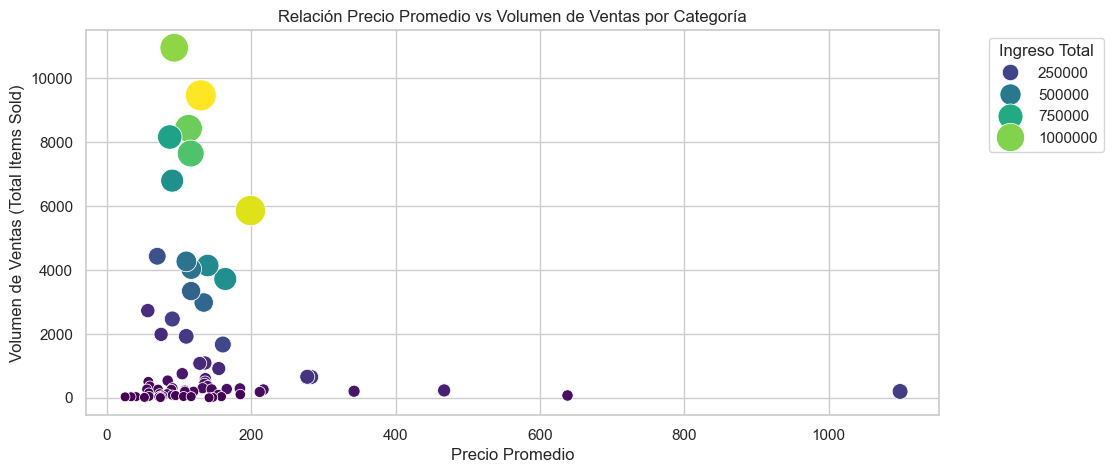

In [62]:
# Preparación de datos para visualización
price_volume_df = category_metrics.copy()

plt.figure(figsize=(11,5))
sns.scatterplot(
    data=price_volume_df,
    x="avg_price",
    y="total_items_sold",
    size="total_revenue",
    hue="total_revenue",
    palette="viridis",
    legend="brief",
    sizes=(50, 500)
)

plt.title("Relación Precio Promedio vs Volumen de Ventas por Categoría")
plt.xlabel("Precio Promedio")
plt.ylabel("Volumen de Ventas (Total Items Sold)")
plt.legend(title="Ingreso Total", bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

*El gráfico muestra que el ***ingreso total se concentra en categorías con precios promedio bajos y altos volúmenes de ventas***, reflejando un modelo de negocio basado en ***rotación masiva de productos***. Los productos de alto precio generan ingresos marginales debido a su ***bajo volumen de ventas***, indicando que la rentabilidad depende principalmente de la eficiencia en el segmento de consumo masivo. La ***mayor oportunidad de optimización comercial*** se encuentra en las categorías de ***volumen medio-alto***, donde un ajuste estratégico de precios podría* ***maximizar márgenes sin afectar la demanda***.

### ***Impacto del costo logístico en la rentabilidad***

Se evalúa cómo el costo de envío afecta la rentabilidad de cada categoría, permitiendo responder la pregunta de negocio:
***¿Qué categorías pierden valor debido a altos costos logísticos y dónde se podrían implementar mejoras operativas o de pricing?***

In [63]:
# Cálculo del impacto del costo logístico por categoría
logistics_impact_df = category_metrics.copy()

# Porcentaje del ingreso absorbido por envío
logistics_impact_df["freight_impact_pct"] = (
    logistics_impact_df["avg_freight_value"] / logistics_impact_df["avg_price"] * 100
)

# Ordenar por impacto logístico descendente
logistics_impact_df = logistics_impact_df.sort_values(
    by="freight_impact_pct",
    ascending=False
)

logistics_impact_df[[
    "product_category_name_english",
    "avg_price",
    "avg_freight_value",
    "freight_impact_pct"
]].head(10)

,product_category_name_english,avg_price,avg_freight_value,freight_impact_pct
46,home_comfort_2,25.34,13.68,53.97
35,flowers,33.64,14.81,44.04
41,furniture_mattress_and_upholstery,116.85,42.74,36.58
12,christmas_supplies,58.25,21.27,36.52
23,diapers_and_hygiene,40.56,14.74,36.34
11,cds_dvds_musicals,52.14,16.07,30.82
62,signaling_and_security,108.20,32.88,30.39
26,electronics,56.81,16.74,29.46
37,food_drink,55.55,16.34,29.41
25,dvds_blu_ray,74.47,20.12,27.02


*El análisis muestra que algunas categorías presentan un ***alto porcentaje de costo logístico respecto al precio promedio***, lo que reduce significativamente su rentabilidad. Por ejemplo, ***home_comfort_2 y flowers tienen más del 40–50 % de su precio absorbido por el envío***, indicando que el margen efectivo es muy bajo a pesar de generar ventas. Categorías como ***furniture_mattress_and_upholstery y christmas_supplies también muestran impactos importantes (~36 %)***, reflejando la presión de la logística en productos voluminosos o pesados.*

*Estas observaciones sugieren ***oportunidades de optimización***, como ajustar precios, negociar costos de envío o priorizar la eficiencia logística en categorías con alto impacto de freight, para mejorar la rentabilidad general del marketplace.*

### ***Análisis de Pareto (80/20)***

Se aplica la regla de Pareto para identificar las categorías y productos que concentran la mayor parte del ingreso total, respondiendo a la pregunta de negocio:
***¿Qué segmentos representan el 80 % del valor generado y deberían ser priorizados estratégicamente para maximizar ingresos y rentabilidad?***

In [64]:
# Ordenar categorías por ingreso total descendente
pareto_df = category_metrics.sort_values(by="total_revenue", ascending=False)

# Calcular porcentaje acumulado de ingreso
pareto_df["cumulative_revenue_pct"] = (
    pareto_df["total_revenue"].cumsum() / pareto_df["total_revenue"].sum() * 100
)

# Identificar categorías que concentran ~80% del ingreso
pareto_df_80 = pareto_df[pareto_df["cumulative_revenue_pct"] <= 80]

pareto_df_80[[
    "product_category_name_english",
    "total_revenue",
    "cumulative_revenue_pct"
]]

,product_category_name_english,total_revenue,cumulative_revenue_pct
43,health_beauty,"1,233,131.72",9.45
70,watches_gifts,"1,166,176.98",18.39
7,bed_bath_table,"1,023,434.76",26.24
65,sports_leisure,"954,852.55",33.56
15,computers_accessories,"888,724.61",40.37
39,furniture_decor,"711,927.69",45.83
49,housewares,"615,628.69",50.55
20,cool_stuff,"610,204.10",55.22
5,auto,"578,966.65",59.66
69,toys,"471,286.48",63.27


*El análisis confirma que ***una minoría de categorías concentra la mayor parte del ingreso total***, siguiendo la regla 80/20 típica de marketplaces. En este caso, ***16 categorías*** representan aproximadamente el ***80% del ingreso***, destacándose health_beauty, watches_gifts, bed_bath_table, sports_leisure y computers_accessories como los principales motores de valor.*

*Esta concentración indica que ***la estrategia comercial y logística debería priorizar estas categorías***, ya que cualquier mejora en precios, promociones o eficiencia operativa en estos segmentos tendrá un ***impacto significativo en los ingresos totales***. Por el contrario, las categorías fuera de este grupo contribuyen marginalmente al ingreso, por lo que su optimización estratégica debe ser secundaria o focalizada en eficiencia de costos.*

### ***Visualización de insights clave***

Se presentan los principales impulsores de ingresos mediante un análisis de concentración, permitiendo a los stakeholders identificar las categorías que dominan el margen operativo. Al filtrar el ruido de las categorías de baja rotación, esta visualización estratégica facilita la toma de decisiones sobre la asignación de recursos, esfuerzos de marketing y optimización de la cadena de suministro en los segmentos de mayor impacto para el negocio.

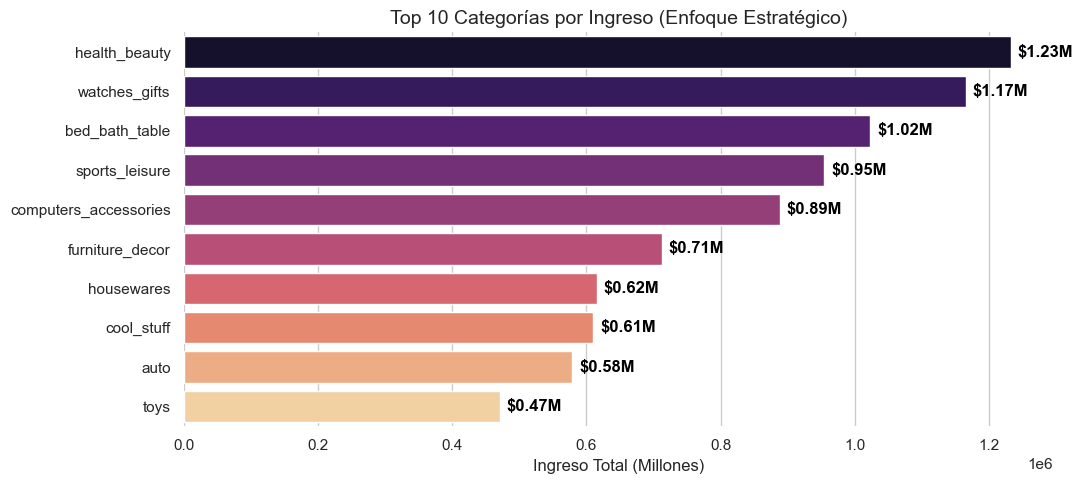

In [69]:
# Filtramos solo las top 10 para enfoque estratégico
top_10 = category_metrics.sort_values("total_revenue", ascending=False).head(10)

plt.figure(figsize=(11, 5))
bars = sns.barplot(
    data=top_10,
    x="total_revenue",
    y="product_category_name_english",
    hue="product_category_name_english",
    palette="magma"
)

# Añadimos etiquetas de valor al final de cada barra para lectura inmediata
for i, v in enumerate(top_10["total_revenue"]):
    plt.text(v + 10000, i, f'${v/1e6:.2f}M', va='center', fontweight='bold', color='black')

plt.title("Top 10 Categorías por Ingreso (Enfoque Estratégico)", fontsize=14)
plt.xlabel("Ingreso Total (Millones)")
plt.ylabel("") # Quitamos el título del eje Y para limpiar
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

*El análisis de concentración de ingresos identifica a ***health_beauty ($1.23M)*** y ***watches_gifts ($1.17M)*** como los principales pilares comerciales, liderando un grupo selecto de diez categorías que definen la mayor parte del flujo financiero del negocio. Esta distribución estratégica demuestra que la rentabilidad depende de un núcleo reducido de segmentos dominantes, lo que permite priorizar la toma de decisiones sobre la asignación de recursos, esfuerzos de marketing y optimización logística en las áreas de mayor impacto, minimizando la dispersión operativa en categorías con contribuciones marginales.*

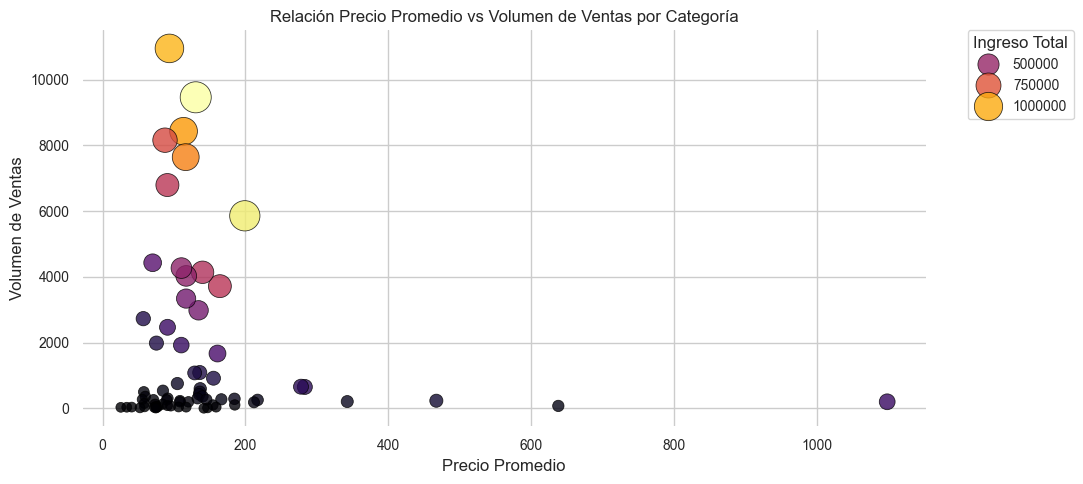

In [75]:
# Scatter: precio vs volumen, tamaño de burbuja por ingreso, estilo inferno
plt.figure(figsize=(11,5))
scatter = sns.scatterplot(
    data=category_metrics,
    x="avg_price",
    y="total_items_sold",
    size="total_revenue",
    hue="total_revenue",
    palette="inferno",
    sizes=(50, 500),
    legend="brief",
    alpha=0.8,  # Hacemos las burbujas un poco traslúcidas
    edgecolor="black"  # Borde negro para mayor claridad
)

# Mejoramos títulos y etiquetas
plt.title("Relación Precio Promedio vs Volumen de Ventas por Categoría", fontsize=12,)
plt.xlabel("Precio Promedio", fontsize=12)
plt.ylabel("Volumen de Ventas", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Leyenda mejor formateada
handles, labels = scatter.get_legend_handles_labels()
plt.legend(handles=handles[1:], labels=labels[1:], title="Ingreso Total", bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=10, title_fontsize=12)

# Limpiamos bordes para estética profesional
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()


*El gráfico muestra que el ***ingreso total se concentra en categorías con precios promedio bajos y altos volúmenes de ventas***, reflejando un modelo de negocio basado en ***rotación masiva de productos***. Los productos de alto precio generan ingresos marginales debido a su ***bajo volumen de ventas***, indicando que la rentabilidad depende principalmente de la eficiencia en el segmento de consumo masivo. La ***mayor oportunidad de optimización comercial*** se encuentra en las categorías de ***volumen medio-alto***, donde un ajuste estratégico de precios podría* ***maximizar márgenes sin afectar la demanda***.

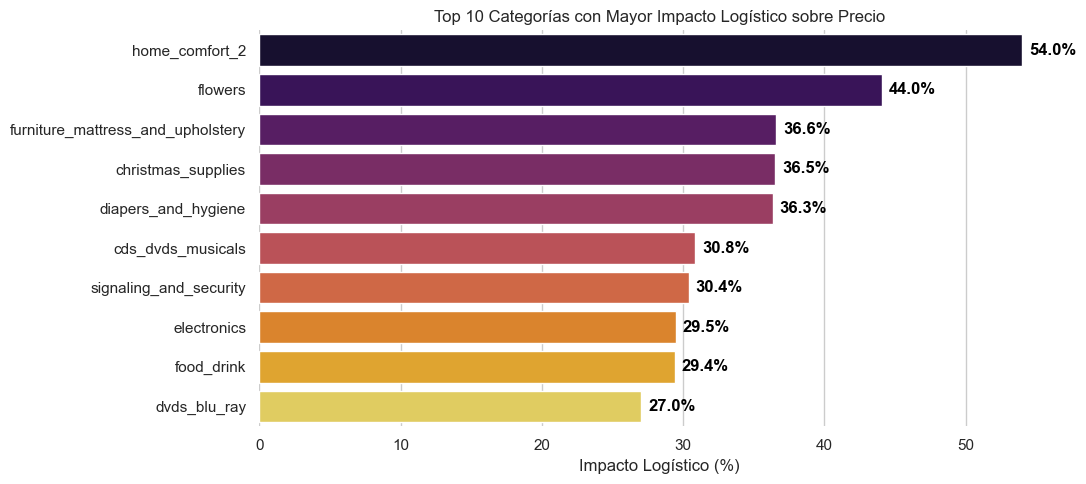

In [77]:
# Top 10 categorías con mayor impacto logístico (% del precio)
top_logistics_impact = logistics_impact_df.sort_values("freight_impact_pct", ascending=False).head(10)

plt.figure(figsize=(11,5))
bars = sns.barplot(
    data=top_logistics_impact,
    x="freight_impact_pct",
    y="product_category_name_english",
    hue="product_category_name_english",
    palette="inferno"
)

# Añadimos etiquetas de valor al final de cada barra
for i, v in enumerate(top_logistics_impact["freight_impact_pct"]):
    plt.text(v + 0.5, i, f'{v:.1f}%', va='center', fontweight='bold', color='black')

plt.title("Top 10 Categorías con Mayor Impacto Logístico sobre Precio", fontsize=12)
plt.xlabel("Impacto Logístico (%)")
plt.ylabel("")  # Limpiamos título del eje Y
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

*El análisis revela una ***dualidad estratégica crítica***: aunque el flujo de ingresos se concentra en categorías líderes como health_beauty ($1.23M) y watches_gifts ($1.17M), la eficiencia operativa se ve comprometida en categorías como ***home_comfort_2*** y ***flowers***, donde el ***costo de envío representa el 54 % y 44 % del precio***, respectivamente.*

*Esto evidencia que, si bien la rentabilidad principal proviene de un núcleo reducido de categorías estratégicas, ***otros segmentos pierden valor debido a altos costos logísticos***, señalando una oportunidad inmediata para ***optimizar la logística o ajustar precios*** en los artículos con mayor impacto operativo, protegiendo así los márgenes globales del marketplace.*

---

### ***Conclusiones y Recomendaciones Estratégicas***

#### ***Conclusiones clave:***

***1. Concentración de ingresos:*** Un pequeño grupo de categorías (ej. health_beauty, watches_gifts, bed_bath_table) concentra aproximadamente el 80 % del ingreso total, confirmando la regla de Pareto típica en e-commerce.

***2. Productos estratégicos:*** Solo unos pocos productos generan gran parte del ingreso neto, mientras que la mayoría tiene contribución marginal, evidenciando un patrón long tail.

***3. Dinámica precio vs volumen:*** La mayor parte del ingreso proviene de productos de precio promedio bajo con alto volumen de ventas, mientras que los artículos de alto precio generan ingresos marginales por bajo volumen.

***4. Impacto logístico:*** Algunas categorías, como home_comfort_2 y flowers, pierden rentabilidad significativa debido a altos costos de envío relativos al precio, afectando la eficiencia global del marketplace.

***5. Oportunidades de optimización:*** Existe un claro espacio para ajustar precios estratégicamente en categorías de volumen medio-alto, priorizar eficiencia logística y concentrar esfuerzos comerciales en las categorías que generan la mayor parte del valor.

#### ***Recomendaciones estratégicas:***

***1. Priorizar categorías líderes:*** Enfocar promociones, marketing y gestión de inventario en las categorías que representan el 80 % del ingreso para maximizar retorno de inversión.

***2. Optimización logística:*** Revisar costos de envío y negociación con operadores en categorías con alto impacto logístico para proteger márgenes.

***3. Estrategia de precios:*** Ajustar precios en categorías de volumen medio-alto para incrementar margen sin afectar demanda.

***4. Gestión de portafolio de productos:*** Identificar productos de alto ingreso y bajo volumen que podrían beneficiarse de bundles o promociones para mejorar desplazamiento y rentabilidad.

***5. Visualización ejecutiva:*** Mantener dashboards claros para stakeholders, destacando categorías estratégicas, productos top, y métricas logísticas, asegurando decisiones rápidas y basadas en datos.